In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
cwd = os.getcwd()
print(cwd)
import os
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/shanks/Desktop/Data Preprocessing
/home/shanks/Desktop/Data Preprocessing/house-prices-advanced-regression-techniques.zip
/home/shanks/Desktop/Data Preprocessing/adavance-house-price-prediction-handling-nan.ipynb
/home/shanks/Desktop/Data Preprocessing/house-prices-advanced-regression-techniques/sample_submission.csv
/home/shanks/Desktop/Data Preprocessing/house-prices-advanced-regression-techniques/test.csv
/home/shanks/Desktop/Data Preprocessing/house-prices-advanced-regression-techniques/train.csv
/home/shanks/Desktop/Data Preprocessing/house-prices-advanced-regression-techniques/data_description.txt
/home/shanks/Desktop/Data Preprocessing/.ipynb_checkpoints/adavance-house-price-prediction-handling-nan-checkpoint.ipynb


In [7]:
f = open("./house-prices-advanced-regression-techniques/data_description.txt", "r")
print(f.read()) 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
train_data=pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")
frames = [test_data, train_data]
data = pd.concat(frames)
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


# Checking null values in Dataset

1. Using Using Pandas

Text(0.5, 1, 'train_data')

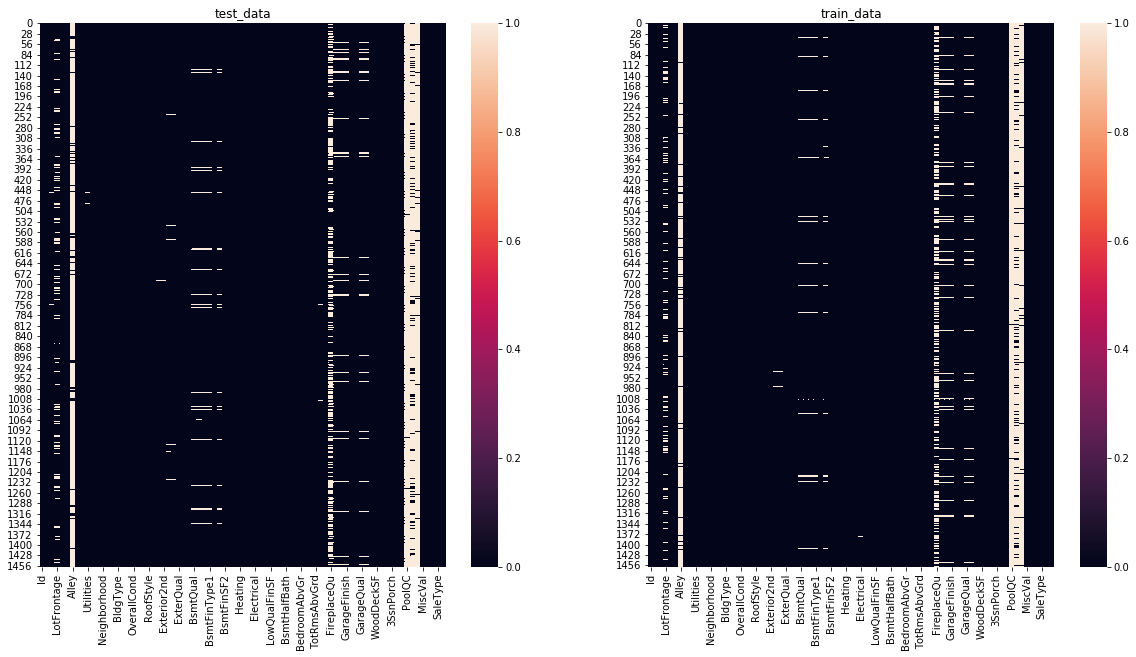

In [10]:
fig, axs = plt.subplots(ncols=2,figsize=(20,10),sharex=False,sharey=False)
sns.heatmap(test_data.isnull(),ax=axs[0])
sns.heatmap(train_data.isnull(),ax=axs[1])
axs[0].set_title('test_data')
axs[1].set_title('train_data')

2. Using Using Pandas

### checking list of columns if it contains null value 

In [11]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

### checking counts of null value in each column

In [12]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

## Calculating % of null value with respect to column 

In [ ]:
1/2919

In [13]:
feature_with_nan_values=[feature for feature in data.columns if data[feature].isnull().sum()>=1]#
#you can try 
#feature_with_nan_values= data.columns[data.isnull().any()]
for feature in feature_with_nan_values:
    print(feature,"",np.round(data[feature].isnull().mean(),5),"% null values")

MSZoning  0.00137 % null values
LotFrontage  0.1665 % null values
Alley  0.93217 % null values
Utilities  0.00069 % null values
Exterior1st  0.00034 % null values
Exterior2nd  0.00034 % null values
MasVnrType  0.00822 % null values
MasVnrArea  0.00788 % null values
BsmtQual  0.02775 % null values
BsmtCond  0.02809 % null values
BsmtExposure  0.02809 % null values
BsmtFinType1  0.02706 % null values
BsmtFinSF1  0.00034 % null values
BsmtFinType2  0.02741 % null values
BsmtFinSF2  0.00034 % null values
BsmtUnfSF  0.00034 % null values
TotalBsmtSF  0.00034 % null values
Electrical  0.00034 % null values
BsmtFullBath  0.00069 % null values
BsmtHalfBath  0.00069 % null values
KitchenQual  0.00034 % null values
Functional  0.00069 % null values
FireplaceQu  0.48647 % null values
GarageType  0.05379 % null values
GarageYrBlt  0.05447 % null values
GarageFinish  0.05447 % null values
GarageCars  0.00034 % null values
GarageArea  0.00034 % null values
GarageQual  0.05447 % null values
GarageCon

### checking which row has null value
#### in above code MSZoning has 4 null value ,what if we need to find which Rows contains null value

In [14]:
data[data["MSZoning"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


### Fitering out nullcolumns and rows where MSZoning is null 

In [15]:
data[data["MSZoning"].isnull()][null_columns]

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
455,NaN,109.0,NaN,NaN,Wd Sdng,Wd Sdng,None,0.0,NaN,NaN,...,Unf,1.0,280.0,TA,TA,NaN,NaN,NaN,ConLD,NaN
756,NaN,80.0,NaN,AllPub,AsbShng,VinylSd,None,0.0,NaN,NaN,...,Unf,2.0,487.0,Fa,Po,NaN,NaN,NaN,WD,NaN
790,NaN,NaN,NaN,AllPub,Wd Sdng,Wd Sdng,None,0.0,TA,TA,...,Unf,1.0,288.0,TA,Fa,NaN,NaN,NaN,WD,NaN
1444,NaN,125.0,NaN,AllPub,CBlock,VinylSd,None,0.0,NaN,NaN,...,Unf,1.0,270.0,Fa,TA,NaN,NaN,NaN,WD,NaN


### Filter_null_dataframe contains only columns where data is null

In [16]:
filter_null_dataframe=data[data.isnull().any(axis=1)][null_columns]
filter_null_dataframe

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD,NaN
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD,NaN
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD,NaN
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD,NaN
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,...,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,175000.0
1456,RL,85.0,NaN,AllPub,Plywood,Plywood,Stone,119.0,Gd,TA,...,Unf,2.0,500.0,TA,TA,NaN,MnPrv,NaN,WD,210000.0
1457,RL,66.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,Gd,...,RFn,1.0,252.0,TA,TA,NaN,GdPrv,Shed,WD,266500.0
1458,RL,68.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,TA,TA,...,Unf,1.0,240.0,TA,TA,NaN,NaN,NaN,WD,142125.0


In [ ]:
data

## Data Types in Statistics
### Categorical Data (Nominal, Ordinal)
### Numerical Data (Discrete, Continuous, Interval, Ratio)

### check which columns has numerical value

In [17]:
 
data.select_dtypes(include=["number","bool"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## First we will check which column s has int and bool "values"  and Which have Catagorical Data (string values)

### WE will split dataframe (data) into two parts
 1. data_with_string_values = "Frame Columns that contins String value"
 2. data_with_int_values = "Frame Columns that contain Int Values"

In [38]:
data.select_dtypes(include=["number","bool"]).columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [39]:
data_with_string_values= data.select_dtypes(exclude=["number","bool"])
data_with_string_values


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
data_with_int_values=data.select_dtypes(include=["number","bool"])
data_with_int_values


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,NaN
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,NaN
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,NaN
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,NaN
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,40,0,0,0,0,0,8,2007,175000.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,349,0,0,0,0,0,0,2,2010,210000.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,60,0,0,0,0,2500,5,2010,266500.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,366,0,112,0,0,0,0,4,2010,142125.0


In [41]:
data_with_string_values

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Further more we will data_with_string_values into two parts 
1. null_dataFrame = columns that contins string data with null value ,we will do data preprossing to handle NaN on Catagorical data

2 columns that contins string data with not null values

In [42]:
data_with_string_values
null_values=data_with_string_values.columns[data_with_string_values.isnull().any()]
not_null_values=[item for item in data_with_string_values.columns if item not in null_values]

In [23]:
data_with_string_values[null_values]

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1,RL,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,Gar2,WD
2,RL,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,...,Typ,TA,Attchd,Fin,TA,TA,NaN,MnPrv,NaN,WD
3,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,...,Typ,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN,WD
4,RL,NaN,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,...,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,Unf,...,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
1456,RL,NaN,AllPub,Plywood,Plywood,Stone,Gd,TA,No,ALQ,...,Min1,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1457,RL,NaN,AllPub,CemntBd,CmentBd,None,TA,Gd,No,GLQ,...,Typ,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed,WD
1458,RL,NaN,AllPub,MetalSd,MetalSd,None,TA,TA,Mn,GLQ,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN,WD


In [24]:
data_with_string_values[not_null_values]

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Normal
1,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Normal
2,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,Y,Normal
3,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,Y,Normal
4,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,Y,Normal
1456,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Normal
1457,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Ex,Gd,Stone,GasA,Ex,Y,Y,Normal
1458,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,Gd,Y,Y,Normal


## Handling NULL Values for Categorical variable

### IN ML we can deal with null values in following ways
* Delete  values : which Can cause huge loss of data
* Assume Null values as new category
* Imputation:- replace with most occuring
* medianClassification by Ml algorithm    
* Clustering by unsupervised learing technique.

to check where nan values are less than 50 (means number of nan values are less then 50 ),We can impute NAN values in this columns with Most frequent Values in columns

In [52]:
null_dataFrame=data_with_string_values[null_values]
null_dataFrame


,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1,RL,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,Gar2,WD
2,RL,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,...,Typ,TA,Attchd,Fin,TA,TA,NaN,MnPrv,NaN,WD
3,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,...,Typ,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN,WD
4,RL,NaN,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,...,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,Unf,...,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
1456,RL,NaN,AllPub,Plywood,Plywood,Stone,Gd,TA,No,ALQ,...,Min1,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1457,RL,NaN,AllPub,CemntBd,CmentBd,None,TA,Gd,No,GLQ,...,Typ,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed,WD
1458,RL,NaN,AllPub,MetalSd,MetalSd,None,TA,TA,Mn,GLQ,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN,WD


In [47]:
columns_NaN_less_then_50=[feature for feature in null_dataFrame.columns if null_dataFrame[feature].isnull().sum()<50]
columns_NaN_less_then_50

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType']

In [53]:
null_dataFrame.isnull().sum()

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [54]:
def replace_with_most_Frequent(DataFrame,ColumnName):
    '''
    1.) This function will replace NaN with Frequent ones
    '''
    print(DataFrame[ColumnName].isnull().sum(),"null value present in"+ColumnName)
    column_index=DataFrame.columns.get_loc(ColumnName)
    DataFrame.iloc[:,column_index] = DataFrame.iloc[:,column_index].fillna(DataFrame.iloc[:,column_index].value_counts().index[0])


['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType'] are columns where nan values are less then  50

In [55]:
for i in columns_NaN_less_then_50:
    print("processing column",i)
    replace_with_most_Frequent(null_dataFrame,i)

null_dataFrame.isnull().sum()

processing column MSZoning
4 null value present inMSZoning
processing column Utilities
2 null value present inUtilities
processing column Exterior1st
1 null value present inExterior1st
processing column Exterior2nd
1 null value present inExterior2nd
processing column MasVnrType
24 null value present inMasVnrType
processing column Electrical
1 null value present inElectrical
processing column KitchenQual
1 null value present inKitchenQual
processing column Functional
2 null value present inFunctional
processing column SaleType
1 null value present inSaleType


/home/shanks/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


MSZoning           0
Alley           2721
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           0
dtype: int64

1. Since Alley Column has more than 90% value NaN we can discard it, like wise Nan values in columns is more then 90% we can discard it


In [56]:
columns_NaN_is_more_then_90=[feature for feature in null_dataFrame.columns if (null_dataFrame[feature].isnull().sum()/null_dataFrame.shape[0])*100>90]
columns_NaN_is_more_then_90


['Alley', 'PoolQC', 'MiscFeature']

In [57]:
def delete_column_from_dataframe(DataFrame,ColumnName):
    '''
      1)This Function deletes Column from DataFrame
    '''
    print((DataFrame[ColumnName].isnull().sum()/DataFrame.shape[0])*100," % null value present in function")
    del DataFrame[ColumnName]

In [58]:
for i in columns_NaN_is_more_then_90:
    print("processing column",i)
    delete_column_from_dataframe(null_dataFrame,i)
null_dataFrame

processing column Alley
93.21685508735868  % null value present in function
processing column PoolQC
99.65741692360398  % null value present in function
processing column MiscFeature
96.40287769784173  % null value present in function


,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,Fence,SaleType
0,RH,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,MnPrv,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,NaN,WD
2,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,MnPrv,WD
3,RL,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,NaN,WD
4,RL,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,NaN,WD
1456,RL,AllPub,Plywood,Plywood,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,MnPrv,WD
1457,RL,AllPub,CemntBd,CmentBd,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,GdPrv,WD
1458,RL,AllPub,MetalSd,MetalSd,None,TA,TA,Mn,GLQ,Rec,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,NaN,WD


lets Assume where Null values are less than 250 we can Consider as a new categories (means we make null values as category "UN"

In [59]:
columns_NaN_less_then_250=[feature for feature in null_dataFrame.columns if (null_dataFrame[feature].isnull().sum()<250 and null_dataFrame[feature].isnull().sum()!=0)]
columns_NaN_less_then_250

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [60]:
null_dataFrame[columns_NaN_less_then_250].isnull().sum()

BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

In [61]:
def  replace_nan_create_category(DataFrame,ColumnName):
     '''
      1)This Function makes Nan A new Category 
     '''
     print(DataFrame[ColumnName].isnull().sum(),"null value present in Columns")
     column_index=DataFrame.columns.get_loc(ColumnName)
     DataFrame.iloc[:,column_index] = np.where(DataFrame.iloc[:,column_index].isnull(),"UN",DataFrame[ColumnName])
     return DataFrame[ColumnName].value_counts()

In [62]:
for i in columns_NaN_less_then_250:
    print("processing column",i)
    replace_nan_create_category(null_dataFrame,i)
null_dataFrame

processing column BsmtQual
81 null value present in Columns
processing column BsmtCond
82 null value present in Columns
processing column BsmtExposure
82 null value present in Columns
processing column BsmtFinType1
79 null value present in Columns
processing column BsmtFinType2
80 null value present in Columns
processing column GarageType
157 null value present in Columns
processing column GarageFinish
159 null value present in Columns
processing column GarageQual
159 null value present in Columns
processing column GarageCond
159 null value present in Columns


/home/shanks/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,Fence,SaleType
0,RH,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,MnPrv,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,NaN,WD
2,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,MnPrv,WD
3,RL,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,NaN,WD
4,RL,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,NaN,WD
1456,RL,AllPub,Plywood,Plywood,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,MnPrv,WD
1457,RL,AllPub,CemntBd,CmentBd,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,GdPrv,WD
1458,RL,AllPub,MetalSd,MetalSd,None,TA,TA,Mn,GLQ,Rec,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,NaN,WD


Now we have only two columns remaining with null data 

In [63]:
for i in ["FireplaceQu","Fence"]:
    print(i,null_dataFrame[i].isnull().sum()*100/null_dataFrame.shape[0],"missing values")

FireplaceQu 48.646796848235695 missing values
Fence 80.43850633778692 missing values
